In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Spotify Song Attributes EDA
- Import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict target using the trained classifier

In [6]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [0]:
train, test = train_test_split(data,test_size=0.15)

In [0]:
# Custom Color Palette 
red_blue = ['#19B5FE','#EF4836']
pallete = sns.color_palette(red_blue)
sns.set_palette(pallete)
sns.set_style('white')

In [0]:
pos_tempo = data[data['target']== 1]['tempo']
neg_tempo = data[data['target']== 0]['tempo']
pos_danceability = data[data['target']== 1]['danceability']
neg_danceability = data[data['target']== 0]['danceability']
pos_duration_ms = data[data['target']== 1]['duration_ms']
neg_duration_ms = data[data['target']== 0]['duration_ms']
pos_speechiness = data[data['target']== 1]['speechiness']
neg_speechiness = data[data['target']== 0]['speechiness']
pos_valence = data[data['target']== 1]['valence']
neg_valence = data[data['target']== 0]['valence']
pos_energy = data[data['target']== 1]['energy']
neg_energy = data[data['target']== 0]['energy']
pos_acousticness = data[data['target']== 1]['acousticness']
neg_acousticness = data[data['target']== 0]['acousticness']
pos_key = data[data['target']== 1]['key']
neg_key = data[data['target']== 0]['key']
pos_instrumentalness = data[data['target']== 1]['instrumentalness']
neg_instrumentalness = data[data['target']== 0]['instrumentalness']
pos_duration = data[data['target']== 1]['duration_ms']
neg_duration = data[data['target']== 0]['duration_ms']
pos_loudness = data[data['target']== 1]['loudness']
neg_loudness = data[data['target']== 0]['loudness']

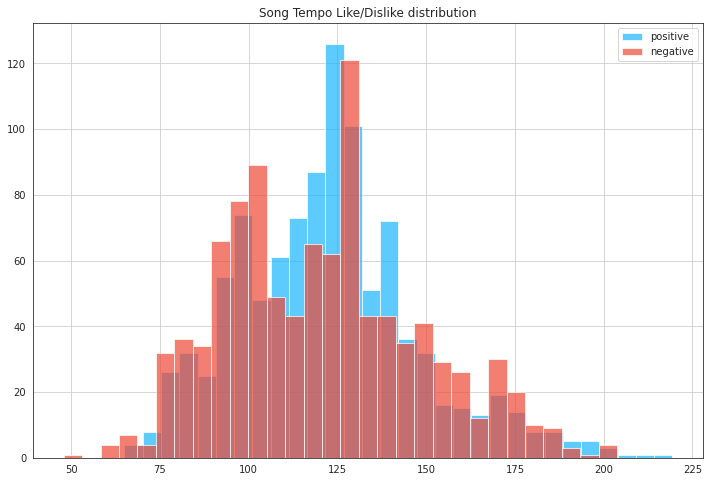

In [16]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like/Dislike distribution')
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

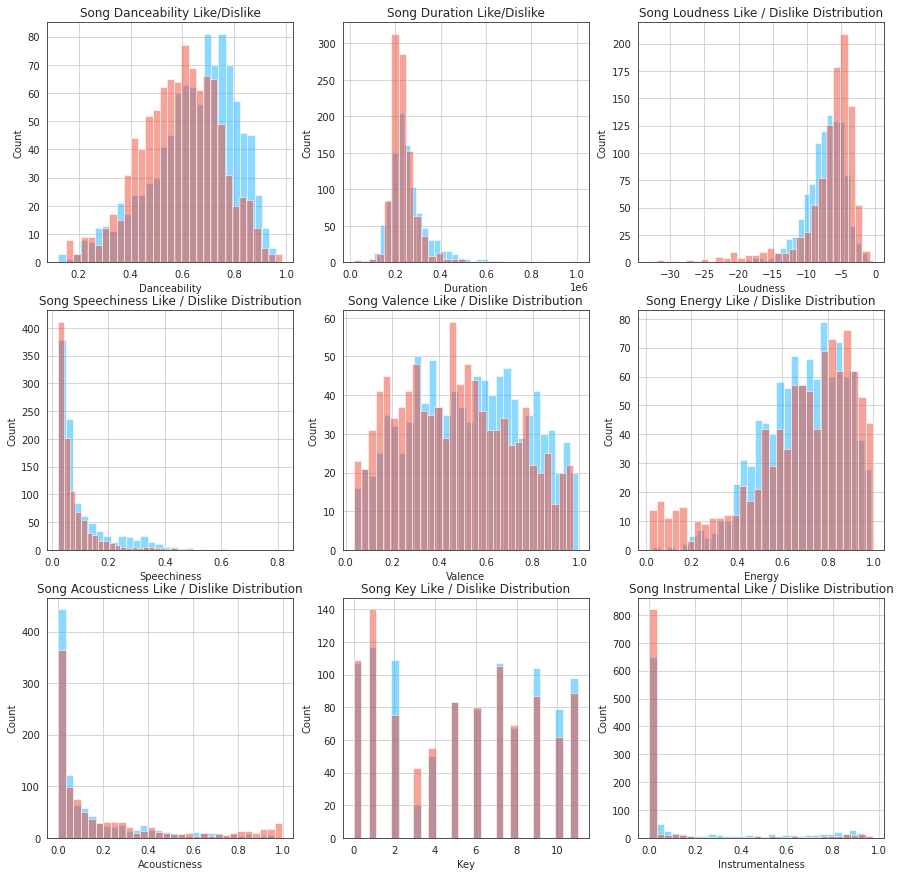

In [23]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like/Dislike')
pos_danceability.hist(alpha=0.5,bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5,bins=30)

# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like/Dislike')
pos_duration.hist(alpha=0.5,bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5,bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like / Dislike Distribution')
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like / Dislike Distribution')
pos_speechiness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like / Dislike Distribution')
pos_valence.hist(alpha=0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like / Dislike Distribution')
pos_energy.hist(alpha=0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acoustic
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Song Acousticness Like / Dislike Distribution')
pos_acousticness.hist(alpha=0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

# Key
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Key')
ax17.set_ylabel('Count')
ax17.set_title('Song Key Like / Dislike Distribution')
pos_key.hist(alpha=0.5, bins=30)
ax18 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

# Instrumentalness
ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumental Like / Dislike Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

In [0]:
c = DecisionTreeClassifier(min_samples_split=100)

In [0]:
features = ['danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [0]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [27]:
c.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
import imageio,io
import pydotplus

In [0]:
def show_tree(tree,features,path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f,feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (20,20)
  plt.imshow(img)

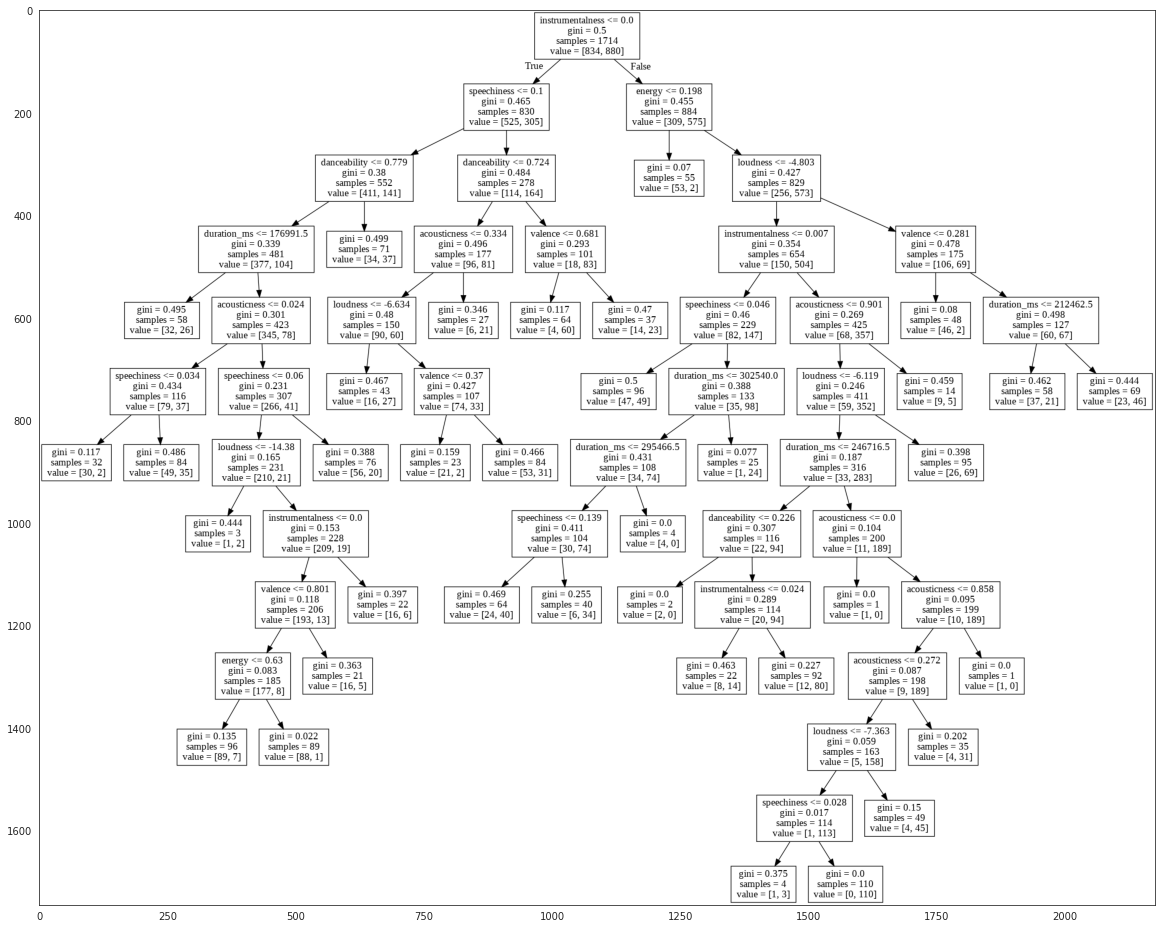

In [38]:
show_tree(c,features,'decision_tree')

In [0]:
y_pred = c.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100

In [41]:
print("Accuracy using Decision Tree: ",score )

Accuracy using Decision Tree:  73.5973597359736
